In [12]:
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = nltk.stem.PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lancasterstemmer = LancasterStemmer()
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/myeongjinhong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/myeongjinhong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
wine = pd.read_csv("winemag-data-130k-v2.csv")

In [14]:
def review_to_words( raw_review ) :
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, "html.parser").get_text()
    # 2. 영문자 아닌 문자 공백으로 변환
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. stopwords를 세트로 변환
    stops = set(stopwords.words("english"))
    # 5. 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간 추출
    stemming_words = [lancasterstemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과 반환
    return(" ".join(stemming_words))

In [15]:
def clean_review(i) :
    return review_to_words(wine["description"][i])

In [16]:
clean_review(18)

'desicc blackberry leath char wood mint aroma carry nos ful body tan heavy oak tinto fino flav clov woodsp sit top blackberry fruit hick forc oak bas aroma ris domin fin'

In [17]:
wine["review_word"] = wine["description"].apply(review_to_words)
wine.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,review_word
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),not honeysuckl cantaloup sweet delicy feath li...
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,cit giv much decad bottl ag pri releas mean pr...
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,wel drain gravel soil giv win crisp dry charac...
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,dry styl pinot gri crisp acid also weight soli...
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit,big rich dry pow intens spicy round text lych ...


In [13]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
import urllib

In [15]:
title_text = " ".join(rv for rv in wine['description'])

In [17]:
title_wordcloud = WordCloud(width = 1024, height = 1024, background_color='#D1310F', 
                            contour_width=1, contour_color='black').generate(title_text)

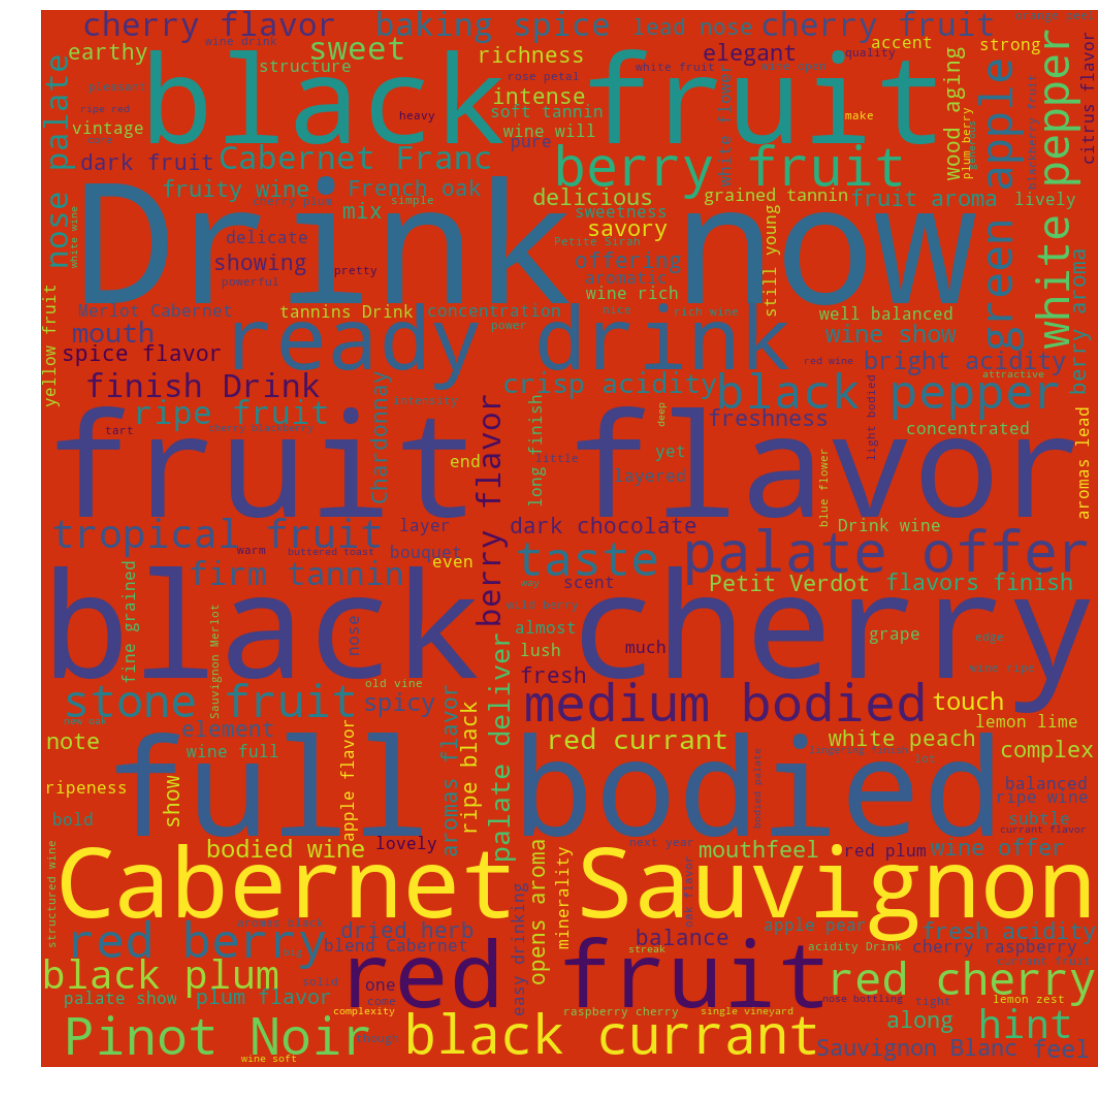

In [18]:
plt.figure( figsize=(30,15), facecolor = 'white' )
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()